In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\yuvim\OneDrive\Documents\PRCP-1009-CellphonePrice.zip")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
print(df.head())
print(df.info())
print(df.isnull().sum())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

## Task 1:

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

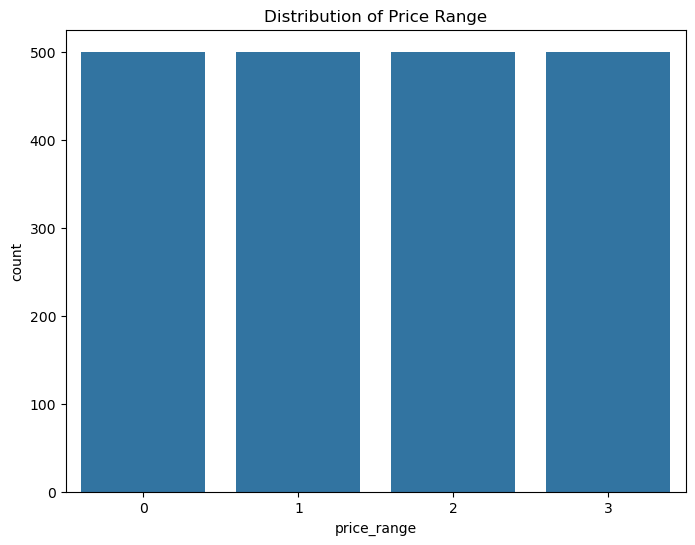

In [6]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='price_range', data=df)
plt.title('Distribution of Price Range')
plt.show()

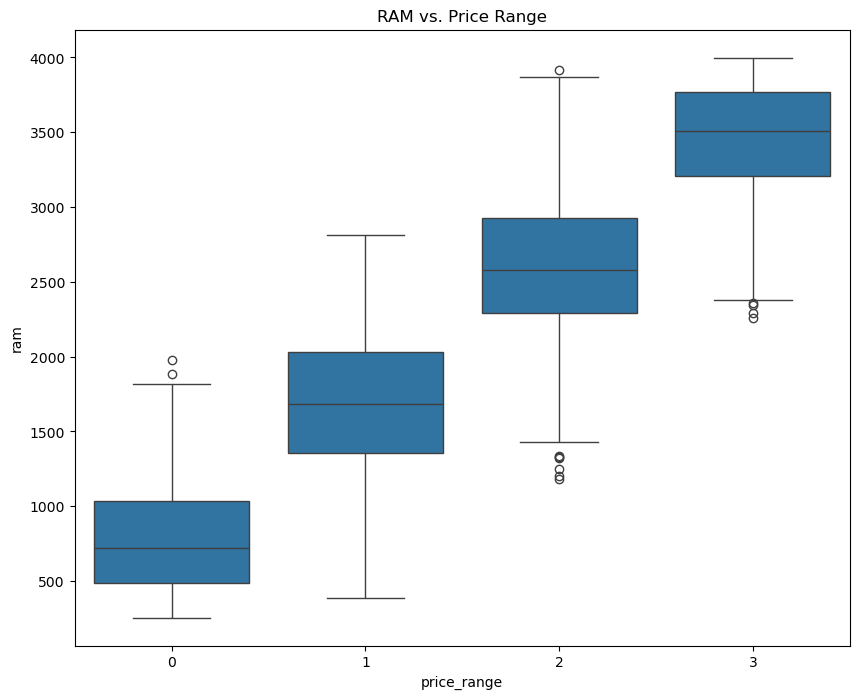

In [7]:
# Relationship between 'ram' and 'price_range'
plt.figure(figsize=(10, 8))
sns.boxplot(x='price_range', y='ram', data=df)
plt.title('RAM vs. Price Range')
plt.show()

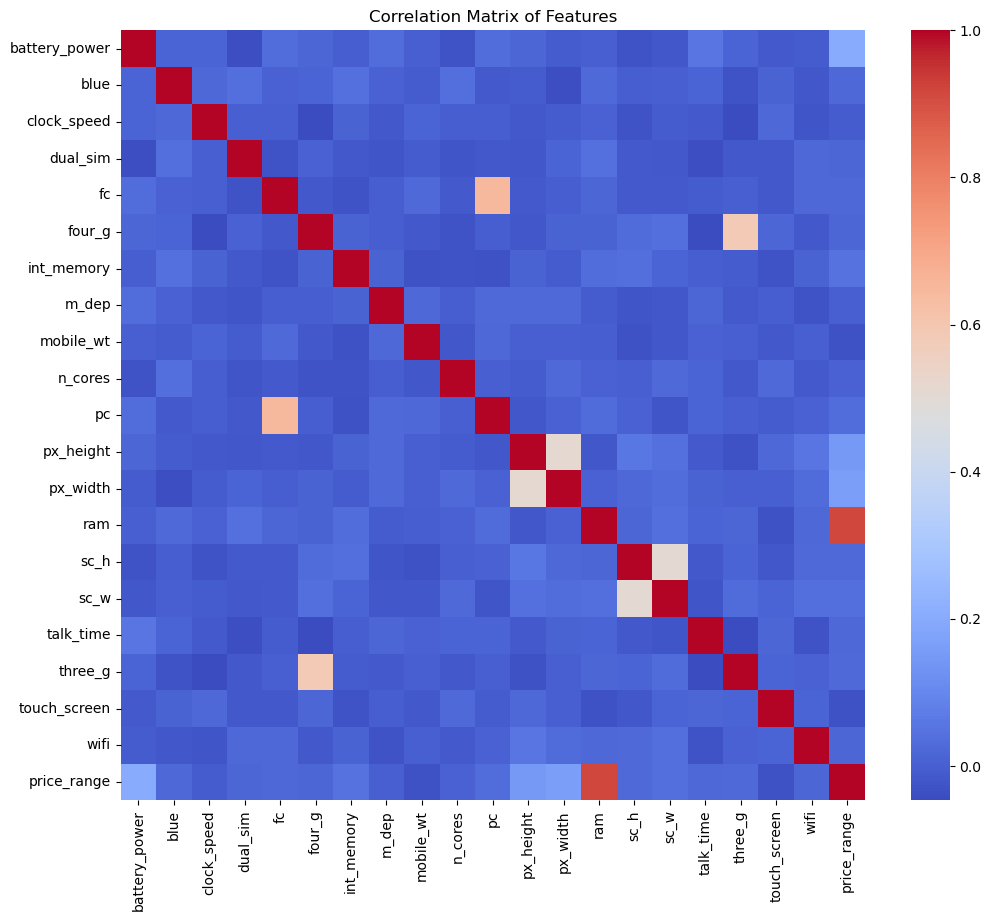

In [8]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
# Define features (X) and target (y)
X = df.drop('price_range', axis=1)
y = df['price_range']

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# Scale numerical features (important for models like SVM, Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Task 2:

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [15]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

results = {}


In [16]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.4f}')
    print(f'Classification Report for {name}:\n{classification_report(y_test, y_pred)}')

Logistic Regression Accuracy: 0.9650
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.96      0.96      0.96       100
           2       0.95      0.94      0.94       100
           3       0.96      0.98      0.97       100

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400

Decision Tree Accuracy: 0.8400
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       100
           1       0.81      0.76      0.78       100
           2       0.75      0.83      0.79       100
           3       0.93      0.84      0.88       100

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      

In [17]:
# Compare and suggest the best model
best_model_name = max(results, key=results.get)
print(f'\nBest Model for Production: {best_model_name} with Accuracy: {results[best_model_name]:.4f}')


Best Model for Production: Logistic Regression with Accuracy: 0.9650


In [18]:
# Assuming Random Forest was chosen as the best model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [19]:
# Get feature importance
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print('\nTop 5 Most Important Features:')
print(feature_importances.head())


Top 5 Most Important Features:
          feature  importance
13            ram    0.463934
0   battery_power    0.072503
12       px_width    0.058868
11      px_height    0.054933
8       mobile_wt    0.041396


## Report on Challenges Faced:

    This report details the challenges encountered during the data analysis and model building process for predicting mobile phone price ranges and the 
techniques used to address them.

## 1.Data Quality and Missing Values:
    The primary challenge in any data-driven project is ensuring the quality and completeness of the dataset. Initially, it was important to check for
missing values or data inconsistencies. However, upon inspection, the provided dataset was found to be clean, with all fields, including battery_power,
ram, int_memory, and price_range, complete and well-formatted. This eliminated the need for complex data imputation techniques.

## 2.Feature Scaling:
    Many machine learning models, particularly those based on distance calculations or gradient descent, like Logistic Regression, are sensitive to
the scale of input features. Features such as ram (Random Access Memory in Megabytes) and talk_time (longest time a single battery charge will last) 
have vastly different scales and units. This disparity can cause features with larger values to dominate the model's learning process.

## Technique Used:
    To address this, StandardScaler from scikit-learn was used. This technique standardizes features by removing the mean and scaling to unit variance.
This ensures that all features contribute equally to the model, which is crucial for achieving optimal performance, especially when comparing different 
models like Logistic Regression and Random Forest.

3.Categorical Target Variable:
    The task was to predict the price_range, which is a categorical variable with four values: 0 (low cost), 1 (medium cost), 2 (high cost), and 3 
(very high cost). While this simplifies the problem from a regression task (predicting a specific price) to a classification task, it required the use 
of classification models rather than regression models.
## Technique Used:
    The problem was framed as a multi-class classification problem. Models such as RandomForestClassifier, DecisionTreeClassifier, and LogisticRegression
were chosen as they are well-suited for this type of problem. The performance was evaluated using classification-specific metrics like accuracy_score and
a classification_report, which provides precision, recall, and F1-score for each price range class.
